In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
RANDOM_STATE = 110

train_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/train_data.csv")
test_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/test_data.csv")

전처리

In [3]:
columns_to_drop = ['CURE END POSITION Z Collect Result_Dam','CURE END POSITION Θ Collect Result_Dam']

train_data = train_data.drop(columns = columns_to_drop, inplace=False)
test_data = test_data.drop(columns = columns_to_drop, inplace=False)

In [4]:
train_data  

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,...,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target,Dispenser_num
0,AJX75334505,4F1XA938-1,240,100,1030,-90,16,14.9,8.4,14.7,...,243.7,243.7,114.612,19.9,7,127,1,NaN,Normal,#1
1,AJX75334505,3KPM0016-2,240,70,1030,-90,10,21.3,4.9,21.3,...,243.7,243.7,85.000,19.6,7,185,1,0.0,Normal,#1
2,AJX75334501,4E1X9167-1,1000,85,280,90,16,14.7,8.5,14.7,...,243.5,243.5,114.612,19.8,10,73,1,NaN,Normal,#2
3,AJX75334501,3K1X0057-1,1000,70,280,90,10,21.3,8.4,21.3,...,243.5,243.5,85.000,19.9,12,268,1,0.0,Normal,#2
4,AJX75334501,3HPM0007-1,240,70,1030,-90,10,9.7,4.9,9.6,...,243.7,243.7,85.000,19.7,8,121,1,0.0,Normal,#1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,70,1030,-90,10,17.0,5.0,17.0,...,243.7,243.7,85.000,19.2,1,318,1,0.0,Normal,#1
40502,AJX75334501,4E1XC796-1,1000,100,280,90,16,14.9,8.5,14.7,...,243.5,243.5,114.612,20.5,14,197,1,NaN,Normal,#2
40503,AJX75334501,4C1XD438-1,240,100,1030,-90,16,14.2,8.2,14.3,...,243.7,243.7,85.000,19.7,1,27,1,NaN,Normal,#1
40504,AJX75334501,3I1XA258-1,1000,70,280,90,10,9.7,4.9,9.7,...,243.5,243.5,85.000,20.1,13,117,1,0.0,Normal,#2


In [5]:
# List of columns to drop
columns_to_drop = [
    "CURE START POSITION X Collect Result_Dam",
    "CURE START POSITION ? Collect Result_Dam",
    "HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam",
    "HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam",
    "Head Purge Position Z Collect Result_Dam",
    "Head Zero Position Y Collect Result_Dam",
    "PalletID Collect Result_Dam",
    "Stage1 Circle2 Distance Speed Collect Result_Dam",
    "Stage1 Circle3 Distance Speed Collect Result_Dam",
    "Stage1 Circle4 Distance Speed Collect Result_Dam",
    "Stage1 Line1 Distance Speed Collect Result_Dam",
    "Stage1 Line2 Distance Speed Collect Result_Dam",
    "Stage1 Line3 Distance Speed Collect Result_Dam",
    "Stage1 Line4 Distance Speed Collect Result_Dam",
    "Stage2 Circle2 Distance Speed Collect Result_Dam",
    "Stage2 Circle3 Distance Speed Collect Result_Dam",
    "Stage2 Circle4 Distance Speed Collect Result_Dam",
    "Stage2 Line2 Distance Speed Collect Result_Dam",
    "Stage2 Line3 Distance Speed Collect Result_Dam",
    "Stage2 Line4 Distance Speed Collect Result_Dam",
    "Stage3 Circle2 Distance Speed Collect Result_Dam",
    "Stage3 Circle3 Distance Speed Collect Result_Dam",
    "Stage3 Circle4 Distance Speed Collect Result_Dam",
    "Stage3 Line2 Distance Speed Collect Result_Dam",
    "Stage3 Line3 Distance Speed Collect Result_Dam",
    "Stage3 Line4 Distance Speed Collect Result_Dam",
    "THICKNESS 2 Collect Result_Dam",
    "THICKNESS 3 Collect Result_Dam",
    "HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1",
    "HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1",
    "HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1",
    "PalletID Collect Result_Fill1",
    "Production Qty Collect Result_Fill1",
    "HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2",
    "PalletID Collect Result_Fill2",
    "Production Qty Collect Result_Fill2"
]

# Drop the specified columns from both datasets
test_data_cleaned = test_data.drop(columns=columns_to_drop, errors='ignore')
train_data_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')

In [7]:
train_data_cleaned['WorkMode Collect Result_Fill2'].value_counts()

WorkMode Collect Result_Fill2
0.0    16447
Name: count, dtype: int64

In [8]:
# target 열을 임시로 분리
target_train = train_data_cleaned['target']
target_test = test_data_cleaned['target']

In [18]:
train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'].value_counts()
test_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2
OK    4881
Name: count, dtype: int64

In [19]:
train_data_cleaned = train_data_cleaned.drop(columns='target',inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns='target',inplace=False)

In [20]:
train_data_cleaned = train_data_cleaned.dropna(axis=1)
test_data_cleaned = test_data_cleaned.dropna(axis=1)

In [22]:
train_data_cleaned.columns.to_list()

['Model.Suffix',
 'Workorder',
 'CURE END POSITION X Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE START POSITION Θ Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Zero Position Z Collect Result_Dam',
 'Machine Tact time Collect Result_Dam',
 'Production Qty Collect Result_Dam',
 'Receip No Collect Result_Dam',
 'Stage1 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage3 

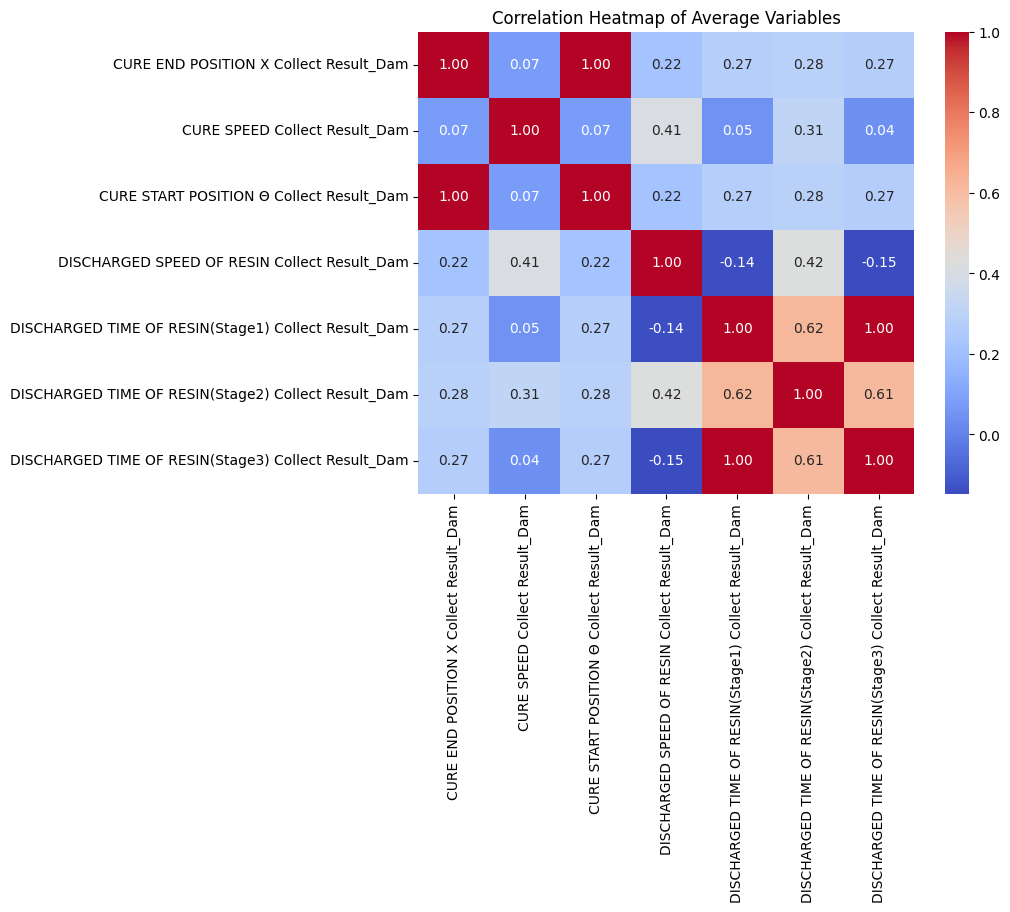

In [26]:
# Select the new average variables
avg_variables = [
    'CURE END POSITION X Collect Result_Dam',
    'CURE SPEED Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',
    'DISCHARGED SPEED OF RESIN Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [27]:
columns_to_drop = ['CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [28]:
train_data_cleaned.columns.to_list()

['Model.Suffix',
 'Workorder',
 'CURE END POSITION X Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Zero Position Z Collect Result_Dam',
 'Machine Tact time Collect Result_Dam',
 'Production Qty Collect Result_Dam',
 'Receip No Collect Result_Dam',
 'Stage1 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage3 Circle1 Distance Speed Collect Result_Dam',
 'Stage3 Line1 Distance Speed Collect Result_Dam',
 'THIC

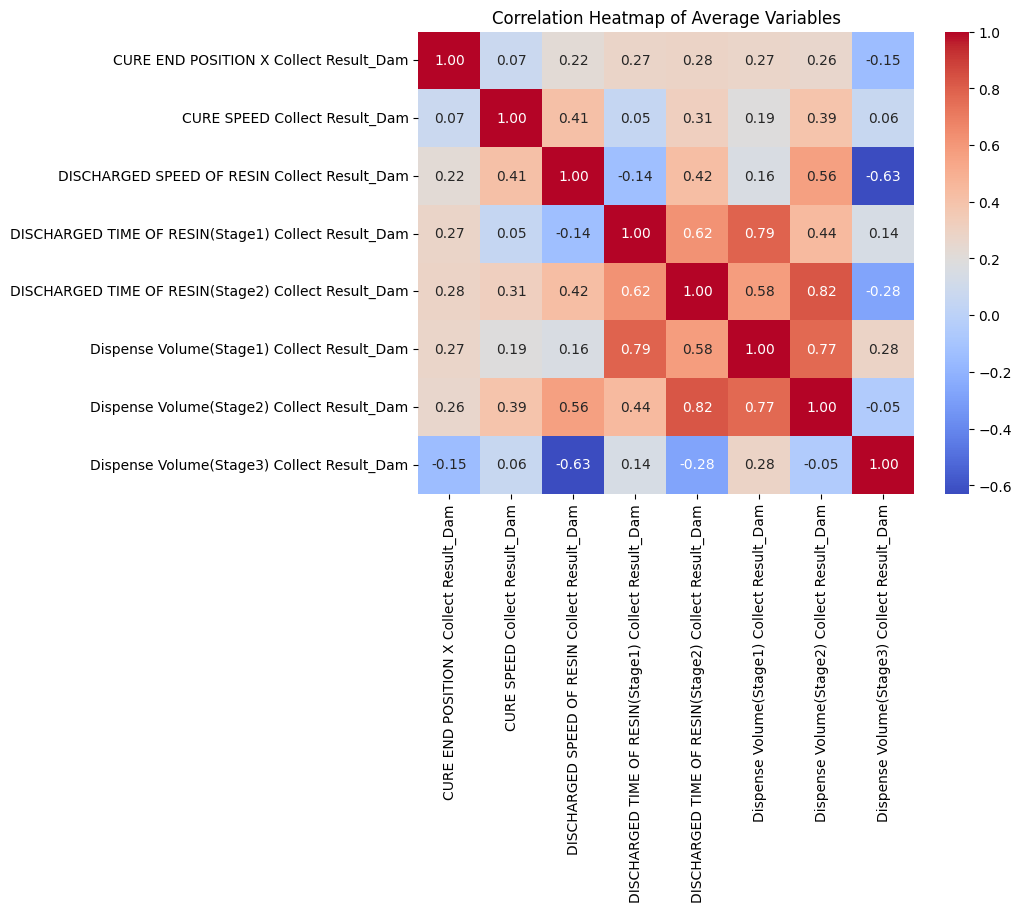

In [29]:
# Select the new average variables
avg_variables = [
    'CURE END POSITION X Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [30]:
columns_to_drop = ['Production Qty Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

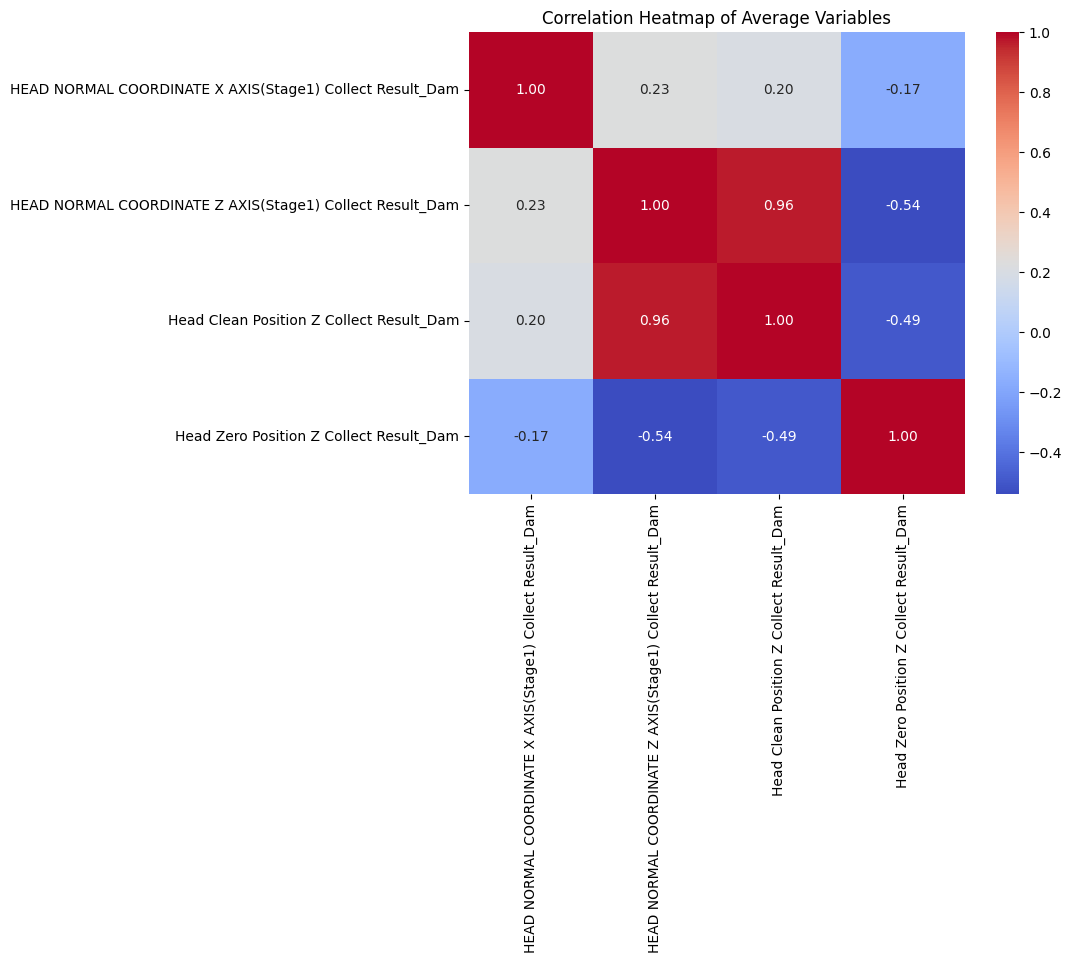

In [31]:
# Select the new average variables
avg_variables = [
   'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Zero Position Z Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [32]:
columns_to_drop = ['Head Clean Position Z Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

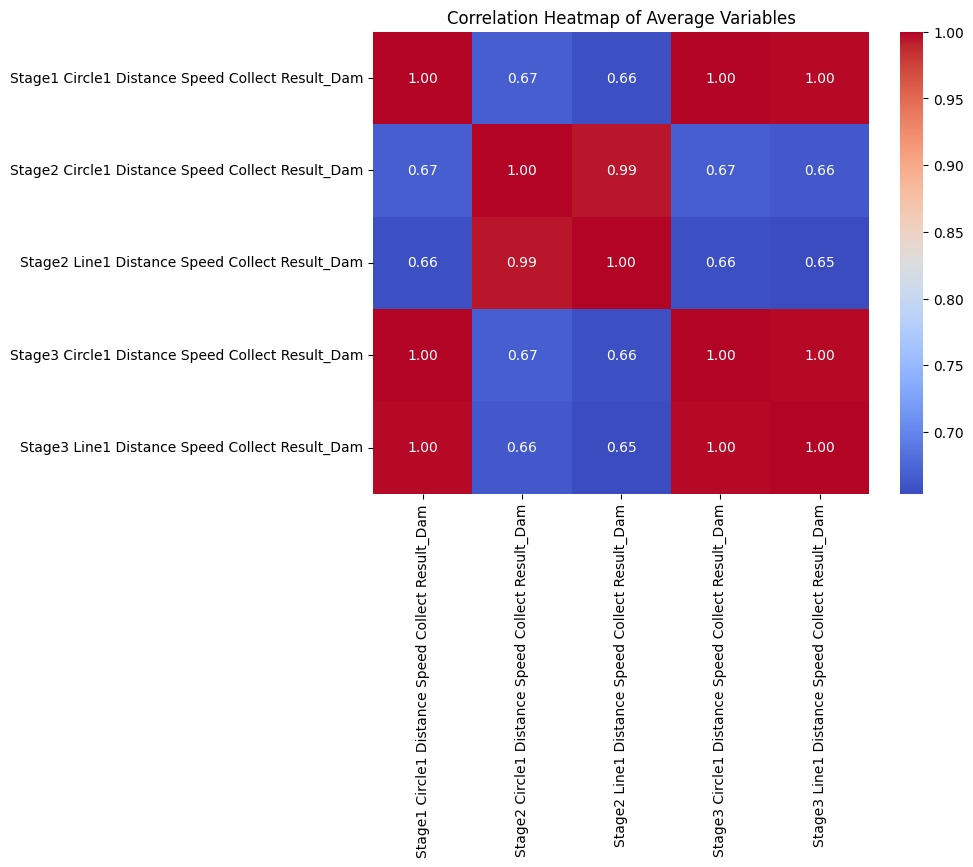

In [33]:
# Select the new average variables
avg_variables = [
    'Stage1 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage3 Circle1 Distance Speed Collect Result_Dam',
 'Stage3 Line1 Distance Speed Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [34]:
columns_to_drop = ['Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage3 Circle1 Distance Speed Collect Result_Dam',
 'Stage3 Line1 Distance Speed Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [35]:
train_data_cleaned

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,...,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,CURE START POSITION Z Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,Dispenser_num
0,AJX75334505,4F1XA938-1,240,100,16,14.9,8.4,1.04,0.58,1.02,...,33,48,33,1020,33,835.5,114.612,19.9,1,#1
1,AJX75334505,3KPM0016-2,240,70,10,21.3,4.9,1.49,0.34,1.49,...,33,50,33,1020,33,835.5,85.000,19.6,1,#1
2,AJX75334501,4E1X9167-1,1000,85,16,14.7,8.5,1.61,0.93,1.61,...,33,50,33,1020,33,305.0,114.612,19.8,1,#2
3,AJX75334501,3K1X0057-1,1000,70,10,21.3,8.4,1.49,0.58,1.49,...,33,50,33,1020,33,305.0,85.000,19.9,1,#2
4,AJX75334501,3HPM0007-1,240,70,10,9.7,4.9,0.67,0.34,1.49,...,32,50,33,1020,33,835.5,85.000,19.7,1,#1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,70,10,17.0,5.0,1.19,0.35,1.49,...,33,50,33,1020,33,835.5,85.000,19.2,1,#1
40502,AJX75334501,4E1XC796-1,1000,100,16,14.9,8.5,1.04,0.59,1.49,...,33,48,33,1020,33,304.8,114.612,20.5,1,#2
40503,AJX75334501,4C1XD438-1,240,100,16,14.2,8.2,0.99,0.57,1.00,...,33,50,33,1020,33,835.5,85.000,19.7,1,#1
40504,AJX75334501,3I1XA258-1,1000,70,10,9.7,4.9,0.67,0.34,1.49,...,33,50,33,1020,33,305.0,85.000,20.1,1,#2


In [37]:
# '_fill1'를 포함하는 열 이름 필터링
Process_Desc_col = train_data_cleaned.filter(like='_Fill1').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
DISCHARGED SPEED OF RESIN Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1
Dispense Volume(Stage1) Collect Result_Fill1
Dispense Volume(Stage2) Collect Result_Fill1
Dispense Volume(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1
Head Purge Position Z Collect Result_Fill1
Machine Tact time Collect Result_Fill1
Receip No Collect Result_Fill1


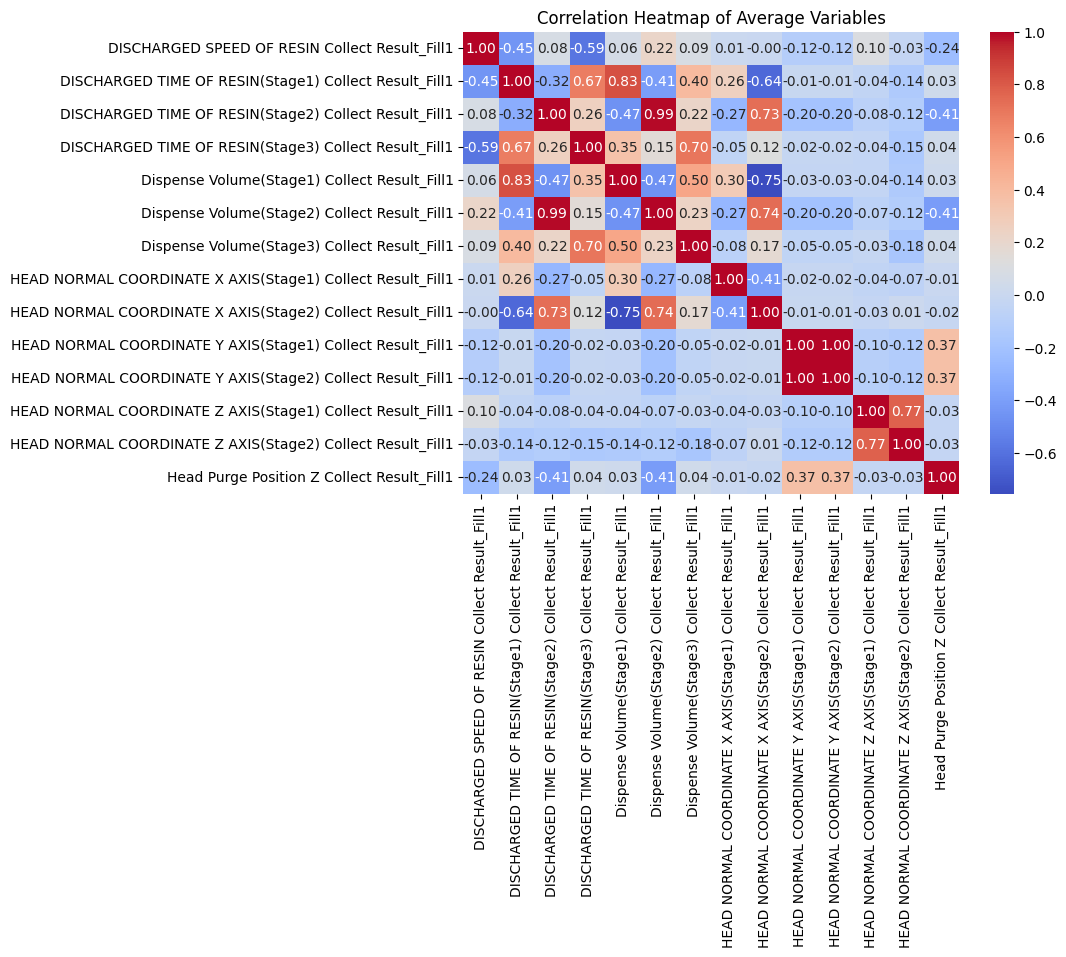

In [38]:
# Select the new average variables
avg_variables = [
    'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1',
'Dispense Volume(Stage1) Collect Result_Fill1',
'Dispense Volume(Stage2) Collect Result_Fill1',
'Dispense Volume(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
'Head Purge Position Z Collect Result_Fill1'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [39]:
columns_to_drop = ['HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1','Dispense Volume(Stage1) Collect Result_Fill1', 'Dispense Volume(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1','HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [45]:
# '_fill2'를 포함하는 열 이름 필터링
Process_Desc_col = train_data_cleaned.filter(like='_Fill2').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Fill2
CURE END POSITION Z Collect Result_Fill2
CURE SPEED Collect Result_Fill2
CURE STANDBY POSITION Z Collect Result_Fill2
CURE START POSITION X Collect Result_Fill2
CURE START POSITION Z Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
Head Purge Position Z Collect Result_Fill2
Machine Tact time Collect Result_Fill2
Receip No Collect Result_Fill2


In [44]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Model.Suffix                                                40506 non-null  object 
 1   Workorder                                                   40506 non-null  object 
 2   CURE END POSITION X Collect Result_Dam                      40506 non-null  int64  
 3   CURE SPEED Collect Result_Dam                               40506 non-null  int64  
 4   DISCHARGED SPEED OF RESIN Collect Result_Dam                40506 non-null  int64  
 5   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         40506 non-null  float64
 6   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         40506 non-null  float64
 7   Dispense Volume(Stage1) Collect Result_Dam                  40506 non-null  float64
 

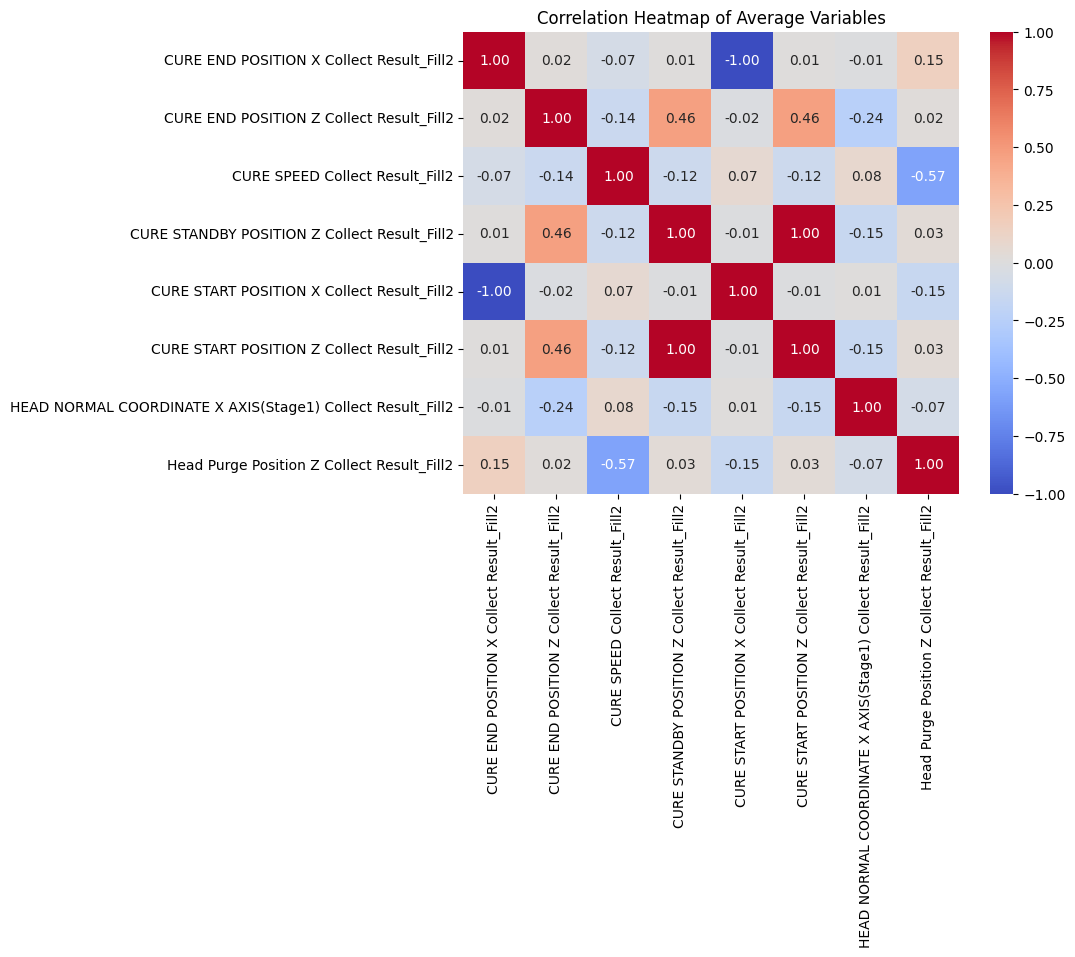

In [46]:
# Select the new average variables
avg_variables = [
    'CURE END POSITION X Collect Result_Fill2',
'CURE END POSITION Z Collect Result_Fill2',
'CURE SPEED Collect Result_Fill2',
'CURE STANDBY POSITION Z Collect Result_Fill2',
'CURE START POSITION X Collect Result_Fill2',
'CURE START POSITION Z Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
'Head Purge Position Z Collect Result_Fill2'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [47]:
columns_to_drop = ['CURE START POSITION Z Collect Result_Fill2']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [50]:
# '_Autoclave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data_cleaned.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("<Autoclave 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Autoclave 공정 관련 변수>
1st Pressure Collect Result_AutoClave
1st Pressure 1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
Chamber Temp. Collect Result_AutoClave
Chamber Temp. Unit Time_AutoClave
Chamber Temp. Judge Value_AutoClave


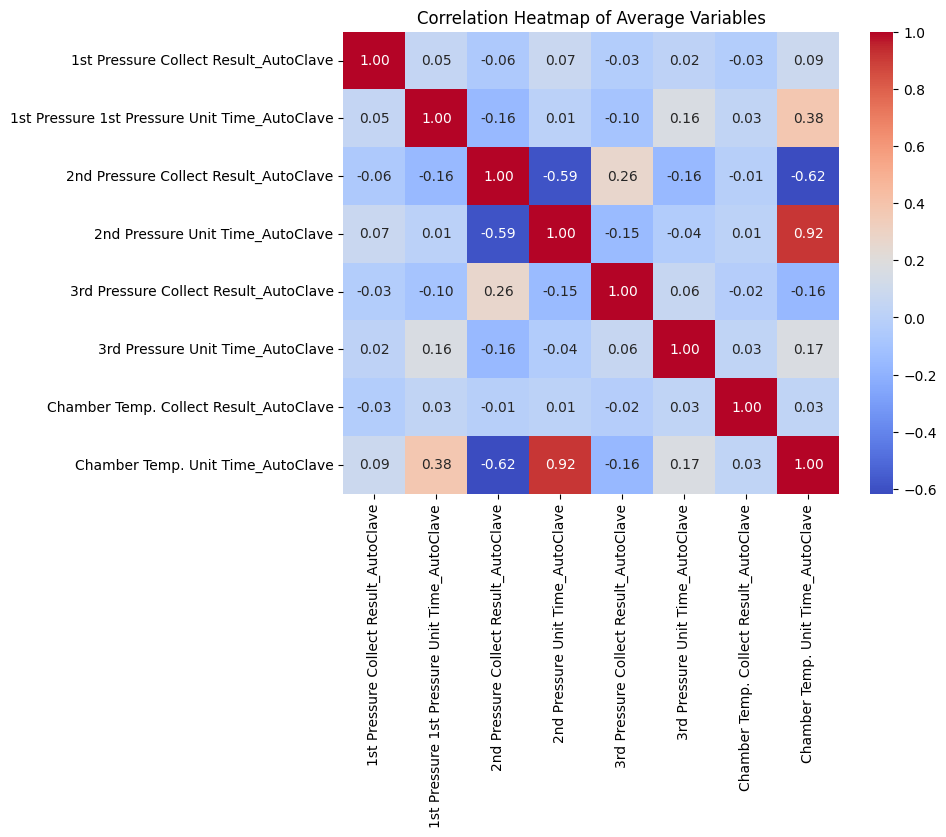

In [53]:
# Select the new average variables
avg_variables = [
    '1st Pressure Collect Result_AutoClave',
'1st Pressure 1st Pressure Unit Time_AutoClave',
'2nd Pressure Collect Result_AutoClave',
'2nd Pressure Unit Time_AutoClave',
'3rd Pressure Collect Result_AutoClave',
'3rd Pressure Unit Time_AutoClave',
'Chamber Temp. Collect Result_AutoClave',
'Chamber Temp. Unit Time_AutoClave'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [54]:
columns_to_drop = ['Chamber Temp. Unit Time_AutoClave']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [57]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 48 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Model.Suffix                                                40506 non-null  object 
 1   Workorder                                                   40506 non-null  object 
 2   CURE END POSITION X Collect Result_Dam                      40506 non-null  int64  
 3   CURE SPEED Collect Result_Dam                               40506 non-null  int64  
 4   DISCHARGED SPEED OF RESIN Collect Result_Dam                40506 non-null  int64  
 5   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         40506 non-null  float64
 6   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         40506 non-null  float64
 7   Dispense Volume(Stage1) Collect Result_Dam                  40506 non-null  float64
 

In [58]:
# Assuming df is your DataFrame and 'column_name' is the column you want to encode
label_encoder = LabelEncoder()

columns_to_encode = ['Model.Suffix', 'Workorder','Dispenser_num']  # List of columns you want to encode
for column in columns_to_encode:
    train_data_cleaned[column + '_encoded'] = label_encoder.fit_transform(train_data_cleaned[column])

In [60]:
for column in columns_to_encode:
    test_data_cleaned[column + '_encoded'] = label_encoder.fit_transform(test_data_cleaned[column])

In [59]:
train_data_cleaned

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,...,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,Dispenser_num,Model.Suffix_encoded,Workorder_encoded,Dispenser_num_encoded
0,AJX75334505,4F1XA938-1,240,100,16,14.9,8.4,1.04,0.58,1.02,...,33,1020,835.5,114.612,19.9,1,#1,3,657,1
1,AJX75334505,3KPM0016-2,240,70,10,21.3,4.9,1.49,0.34,1.49,...,33,1020,835.5,85.000,19.6,1,#1,3,283,1
2,AJX75334501,4E1X9167-1,1000,85,16,14.7,8.5,1.61,0.93,1.61,...,33,1020,305.0,114.612,19.8,1,#2,0,589,2
3,AJX75334501,3K1X0057-1,1000,70,10,21.3,8.4,1.49,0.58,1.49,...,33,1020,305.0,85.000,19.9,1,#2,0,251,2
4,AJX75334501,3HPM0007-1,240,70,10,9.7,4.9,0.67,0.34,1.49,...,33,1020,835.5,85.000,19.7,1,#1,0,142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,70,10,17.0,5.0,1.19,0.35,1.49,...,33,1020,835.5,85.000,19.2,1,#1,0,238,1
40502,AJX75334501,4E1XC796-1,1000,100,16,14.9,8.5,1.04,0.59,1.49,...,33,1020,304.8,114.612,20.5,1,#2,0,643,2
40503,AJX75334501,4C1XD438-1,240,100,16,14.2,8.2,0.99,0.57,1.00,...,33,1020,835.5,85.000,19.7,1,#1,0,540,1
40504,AJX75334501,3I1XA258-1,1000,70,10,9.7,4.9,0.67,0.34,1.49,...,33,1020,305.0,85.000,20.1,1,#2,0,164,2


In [61]:
columns_to_drop = ['Model.Suffix', 'Workorder','Dispenser_num']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [64]:
# Assuming df is your DataFrame
object_columns = train_data_cleaned.dtypes[train_data_cleaned.dtypes == 'object']

# Check if there are any columns with object data type
if not object_columns.empty:
    print("Columns with object data type:")
    print(object_columns)
else:
    print("No columns with object data type found.")

Columns with object data type:
Chamber Temp. Judge Value_AutoClave    object
dtype: object


In [66]:
train_data_cleaned = train_data_cleaned.drop(columns='Chamber Temp. Judge Value_AutoClave',inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns='Chamber Temp. Judge Value_AutoClave',inplace=False)

In [69]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 47 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   CURE END POSITION X Collect Result_Dam                      40506 non-null  int64  
 1   CURE SPEED Collect Result_Dam                               40506 non-null  int64  
 2   DISCHARGED SPEED OF RESIN Collect Result_Dam                40506 non-null  int64  
 3   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         40506 non-null  float64
 4   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         40506 non-null  float64
 5   Dispense Volume(Stage1) Collect Result_Dam                  40506 non-null  float64
 6   Dispense Volume(Stage2) Collect Result_Dam                  40506 non-null  float64
 7   Dispense Volume(Stage3) Collect Result_Dam                  40506 non-null  float64
 

In [70]:
test_data_cleaned

,Set ID,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,...,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,Model.Suffix_encoded,Workorder_encoded,Dispenser_num_encoded
0,0001be084fbc4aaa9d921f39e595961b,1000.0,70,10,17.0,4.9,1.19,0.34,1.19,162.4,...,50,33,1020,305.0,85.0,19.8,1.0,0,240,2
1,0005bbd180064abd99e63f9ed3e1ac80,1000.0,70,16,14.2,8.3,0.99,0.58,0.99,162.4,...,50,33,1020,305.0,85.0,19.8,1.0,0,509,2
2,000948934c4140d883d670adcb609584,240.0,70,10,9.7,4.9,0.67,0.34,0.67,549.5,...,50,23,1020,835.5,85.0,19.7,1.0,0,128,1
3,000a6bfd02874c6296dc7b2e9c5678a7,1000.0,70,10,21.3,10.6,1.49,0.74,1.49,164.2,...,50,33,1020,305.0,85.0,20.0,1.0,0,306,2
4,0018e78ce91343678716e2ea27a51c95,240.0,70,16,13.2,7.5,0.92,0.52,0.92,550.4,...,50,33,1020,835.5,85.0,19.8,1.0,0,415,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,1000.0,70,10,21.3,10.6,1.49,0.74,1.49,162.4,...,50,33,1020,305.0,85.0,19.5,1.0,0,277,2
17357,ffed8923c8a448a98afc641b770be153,1000.0,70,16,13.2,7.6,0.92,0.53,0.92,162.7,...,50,33,1020,305.0,85.0,19.8,1.0,0,439,2
17358,fff1e73734da40adbe805359b3efb462,240.0,70,16,13.2,6.6,1.45,0.72,1.45,551.5,...,50,33,1020,835.5,85.0,20.5,1.0,0,314,1
17359,fff8e38bdd09470baf95f71e92075dec,240.0,70,10,9.7,3.9,0.67,0.27,0.67,549.0,...,51,22,1020,835.5,85.0,18.9,1.0,0,8,1


In [72]:
target_train
target_test

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17356   NaN
17357   NaN
17358   NaN
17359   NaN
17360   NaN
Name: target, Length: 17361, dtype: float64

모델링

In [ ]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

train_x = df_train[features]
train_y = df_train["target"]

model.fit(train_x, train_y)

In [ ]:
df_test_x = test_data_cleaned[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue